###Name:     Rohith Kumar E (212SP026), Sandhya Verma (212SP028)
###Branch:   M.Tech SPML 1st year
###Subject:  Project - Signal Processing Laboratory

In [155]:
!pip install pydub

from os import path
from pydub import AudioSegment
import numpy as np
from scipy.io.wavfile import read
from scipy import signal
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [156]:
#mp3 to wav file
input_file = "flute.mp3"
output_file = "flute.wav"

sound = AudioSegment.from_mp3(input_file)
sound.export(output_file, format="wav")

<_io.BufferedRandom name='flute.wav'>

In [157]:
# Stereo wav file to Mono wav file
from pydub import AudioSegment
sound = AudioSegment.from_wav("flute.wav")
sound = sound.set_channels(1)
sound.export("flute_C1.wav", format="wav")

sound = AudioSegment.from_wav("flute.wav")
sound = sound.set_channels(2)
sound.export("flute_C2.wav", format="wav")

<_io.BufferedRandom name='flute_C2.wav'>

Text(0.5, 0, 'Frequency')

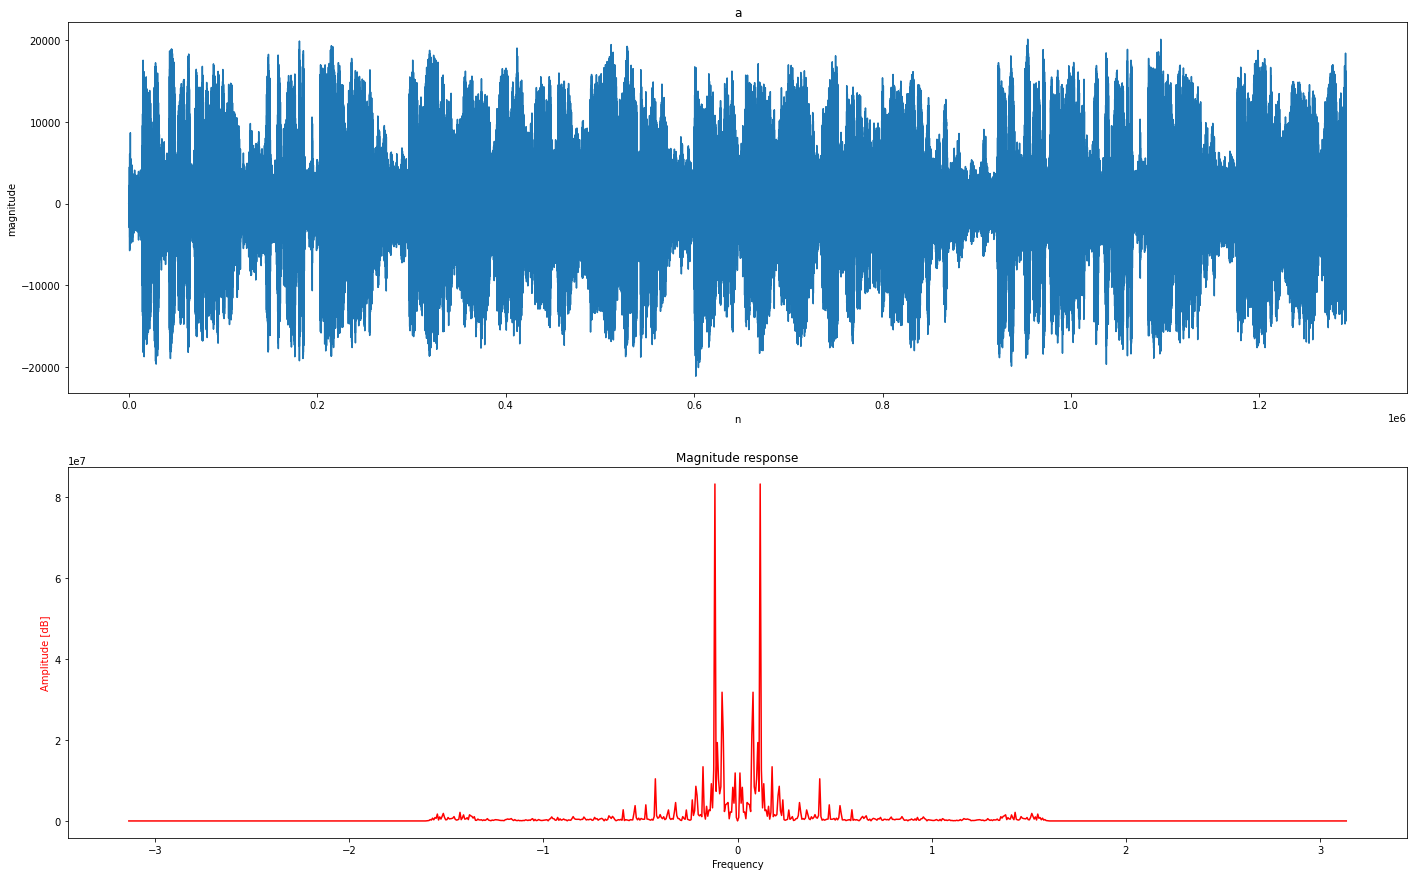

In [158]:
sampling_rate, a = read("flute_C1.wav")
signal0 = np.array(a,dtype=float)
n0= np.arange(0,len(signal0),1)

w0, h0 = signal.freqz(signal0)

fig, ax = plt.subplots(2,1, figsize=(24,15))
ax[0].set_title('a')
ax[0].plot(n0, signal0)
ax[0].set_ylabel('magnitude')
ax[0].set_xlabel('n')

ax[1].set_title('Magnitude response')
ax[1].plot(w0, abs(h0), 'r')
ax[1].plot(-w0, abs(h0), 'r')
ax[1].set_ylabel('Amplitude [dB]', color='r')
ax[1].set_xlabel('Frequency')

In [159]:
import librosa
#mel_spec = librosa.feature.melspectrogram(y=signal0, sr=sampling_rate)
S = librosa.feature.melspectrogram(y=signal0, sr=sampling_rate, n_mels=6, fmax=8000, fmin=125)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

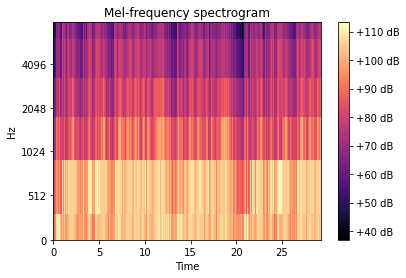

In [160]:
import matplotlib.pyplot as plt
import librosa.display
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=1.0)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sampling_rate, fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [161]:
Sig_norm = librosa.db_to_power(S_dB, ref=1.0)

In [162]:
Sig_audio = librosa.feature.inverse.mel_to_audio(M=Sig_norm, sr=sampling_rate, fmax=8000)

Text(0.5, 0, 'Frequency')

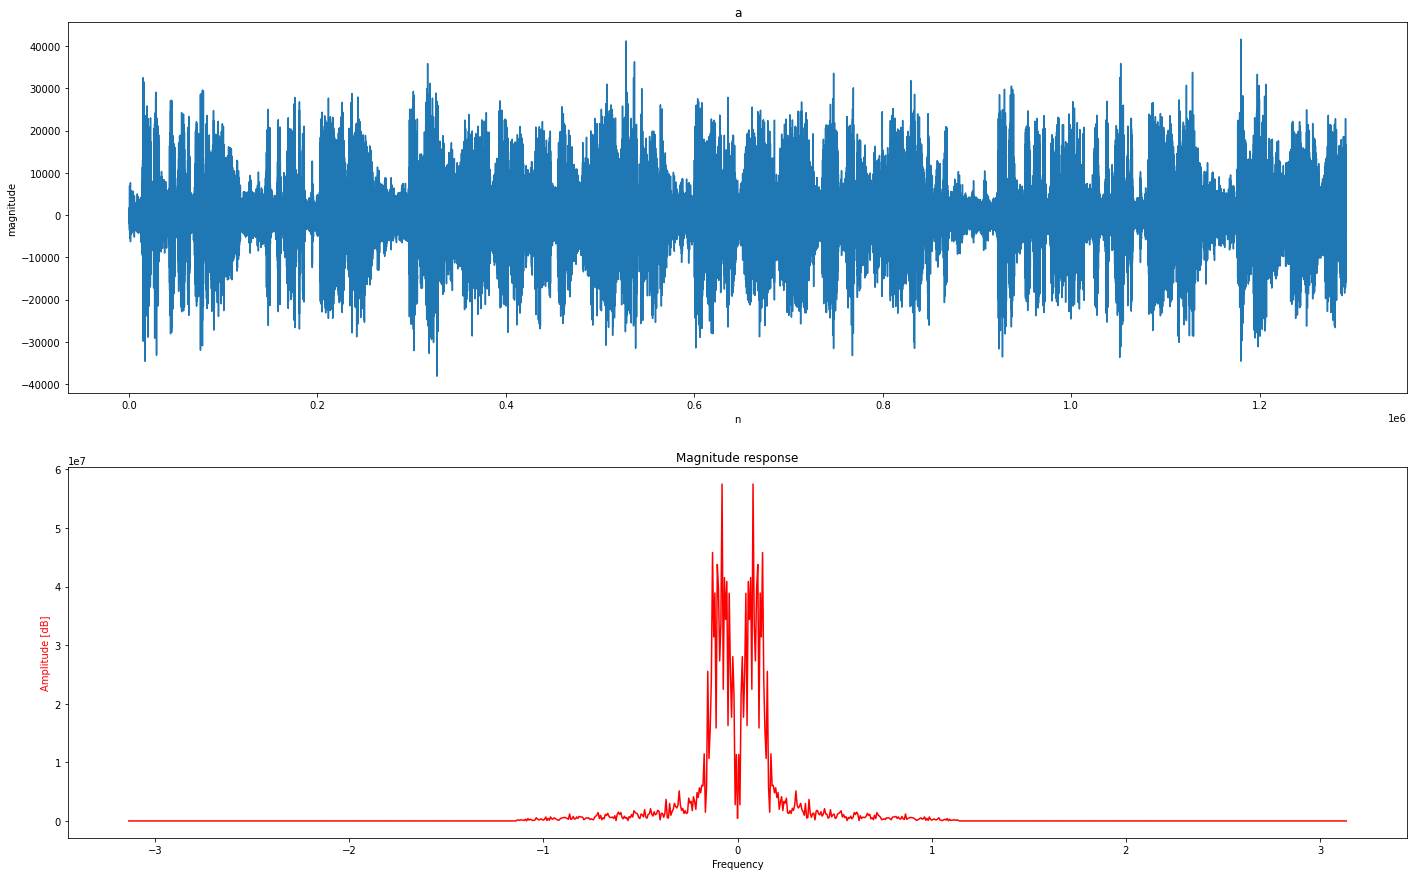

In [163]:
Sig_scale = Sig_audio
n0= np.arange(0,len(Sig_scale),1)

w0, h0 = signal.freqz(Sig_scale)

fig, ax = plt.subplots(2,1, figsize=(24,15))
ax[0].set_title('a')
ax[0].plot(n0, Sig_scale)
ax[0].set_ylabel('magnitude')
ax[0].set_xlabel('n')

ax[1].set_title('Magnitude response')
ax[1].plot(w0, abs(h0), 'r')
ax[1].plot(-w0, abs(h0), 'r')
ax[1].set_ylabel('Amplitude [dB]', color='r')
ax[1].set_xlabel('Frequency')

In [164]:
from scipy.io.wavfile import write
samplerate = sampling_rate; 
write("output.wav", samplerate, Sig_scale.astype(np.int16))

In [165]:
Play = S_dB

In [166]:
def sim(audio, lim0, s0, lim1, s1, lim2, s2, lim3, s3, lim4, s4, lim5, s5 ):
  for i in range(0,len(audio[0])):
    if audio[0][i] > lim0:
      audio[0][i] /= s0
  for i in range(0,len(audio[1])):
    if audio[1][i] > lim1:
      audio[1][i] /= s1
  for i in range(0,len(audio[2])):
    if audio[2][i] > lim2:
      audio[2][i] /= s2
  for i in range(0,len(audio[3])):
    if audio[3][i] > lim3:
      audio[3][i] /= s3
  for i in range(0,len(audio[4])):
    if audio[4][i] > lim4:
      audio[4][i] /= s4
  for i in range(0,len(audio[5])):
    if audio[5][i] > lim5:
      audio[5][i] /= s5
  return audio

In [167]:
final = sim(Play, 80,1.1, 70, 1.3, 60, 1.4, 50, 1.7, 40, 1.9,  30, 2)

In [168]:
Play_norm = librosa.db_to_power(Play, ref=1.0)

In [169]:
Play_audio = librosa.feature.inverse.mel_to_audio(M=Play_norm, sr=sampling_rate, fmax=8000)

Text(0.5, 0, 'Frequency')

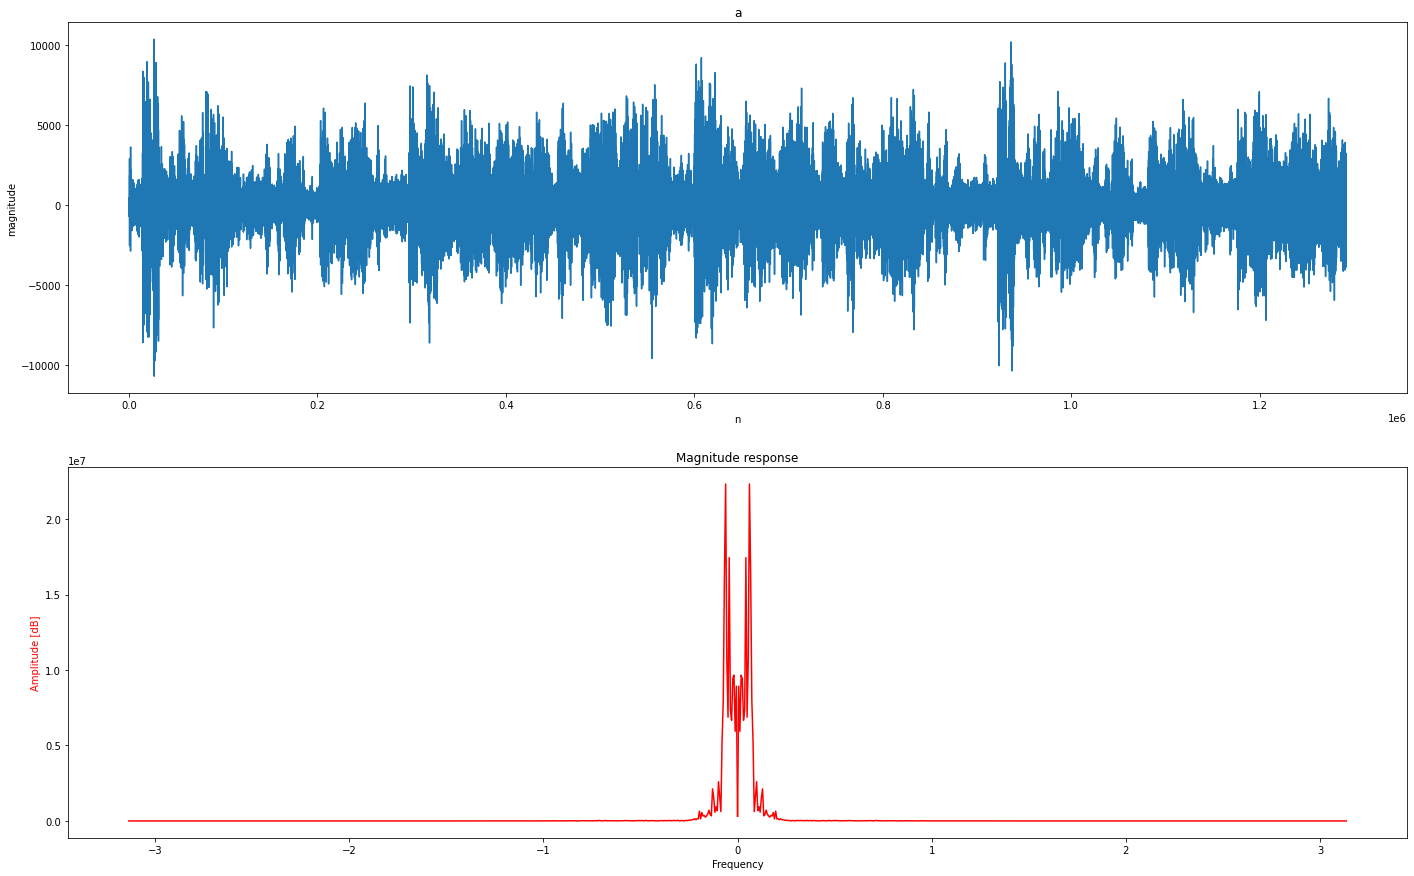

In [170]:
Play_scale = Play_audio #* 2000000
n0= np.arange(0,len(Play_scale),1)

w0, h0 = signal.freqz(Play_scale)

fig, ax = plt.subplots(2,1, figsize=(24,15))
ax[0].set_title('a')
ax[0].plot(n0, Play_scale)
ax[0].set_ylabel('magnitude')
ax[0].set_xlabel('n')

ax[1].set_title('Magnitude response')
ax[1].plot(w0, abs(h0), 'r')
ax[1].plot(-w0, abs(h0), 'r')
ax[1].set_ylabel('Amplitude [dB]', color='r')
ax[1].set_xlabel('Frequency')

In [171]:
from scipy.io.wavfile import write
samplerate = sampling_rate; 
write("output1.wav", samplerate, Play_scale.astype(np.int16))